Building the Network...
Starting simulation at t=0. s for a duration of 50. ms
0.05 (100%) simulated in < 1s
Starting simulation at t=50. ms for a duration of 100. ms
0.1 (100%) simulated in < 1s
Starting simulation at t=150. ms for a duration of 50. ms
0.05 (100%) simulated in < 1s


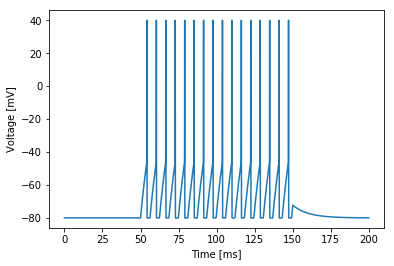

The peak voltage is:  34.43407794 mV


In [2]:
from brian2 import *
import matplotlib.pyplot as plt

# =============================================================================
# Simulation parameters
simtime         = 100 * ms
defaultclock.dt = 0.1 * ms
# =============================================================================

# =============================================================================

print ("Building the Network...")

# Parameters for Excitatory Neurons
E_L       = -80. * mV      # reversal (rest) membrane potential
V_thr     = -45. * mV      # threshold for spike
V_reset   = -80. * mV      # reset potential after an emission of a spike
C_m_E     = 1.0 * uF/cm**2 # membrane capacitance
g_L       = 0.1 * mS/cm**2 # leak conductunce
g_c       = 0.2 * mS/cm**2 # coupling conductance
tau_rp_E  = 2.0 * ms       # refractory period

# Synaptic constants
E_ext     = 0. * mV
g_ext     = 0.1 * mS/cm**2
tau_ext   = 5. * ms

# =============================================================================
# Modeling Pyramidal and Interneurons
# =============================================================================

eqs_E = '''

dv_soma / dt = ( - g_L * ( v_soma - E_L ) + I) / C_m_E : volt (unless refractory)
I : amp/meter**2
'''

P_E = NeuronGroup(1, eqs_E, threshold='v_soma > V_thr', reset='v_soma = V_reset', refractory=tau_rp_E, method='euler')
P_E.v_soma  = E_L

# =============================================================================

# =============================================================================

M = StateMonitor(P_E, ('v_soma', 'I'), record=True)
S = SpikeMonitor(P_E)

# SIMULATION RUNNING
net = Network(collect())
net.add(M)
net.add(S)
P_E.I = 0.0 * uA / cm**2
net.run(50 * ms, report='stdout')
P_E.I = 10.0 * uA / cm**2
net.run(100 * ms, report='stdout')
P_E.I = 0.0 * uA / cm**2
net.run(50 * ms, report='stdout')

# =============================================================================
# A N A L Y S I S    o f    t h e    S I M U L A T I O N
# =============================================================================
plt.figure(1)
V = M.v_soma[0]
for t in S.spike_trains()[0]:
    s = int(t/defaultclock.dt)
    V[s] = 40 * mV
plt.plot(M.t/ms, V / mV, label='soma')
plt.xlabel("Time [ms]")
plt.ylabel("Voltage [mV]")
plt.show()

print ("The peak voltage is: ", max(M[0].v_soma)-E_L)


The aim of this exercise is to:

1. Stimulate the cell with differnt currents (from 0 to 20 with step 2) and record its maximum response.
2. Add a dendritic compartment and perform the aforementioned protocol adding now the external current in the dendrite.
3. Add a simple alpha synapse at the dendrite and stimulate it using a Poisson spike train (10 neurons, 10-100 * Hz, step 10 Hz). Calculate the number of spikes and give a plot of frequency vs. rate
4. Add an NMDA and a GABAB synapse on the dendritic compartment. Stimulate it with the same protocol.